<a href="https://colab.research.google.com/gist/saiyankakarot/c958789f19fd5cbf4683600105805ba7/untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pandas matplotlib seaborn plotly


In [11]:
import pandas as pd

# Load your dataset
df = pd.read_excel('Online Retail Data Set.xlsx')  # adjust filename if needed

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create a Revenue column
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Drop rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])


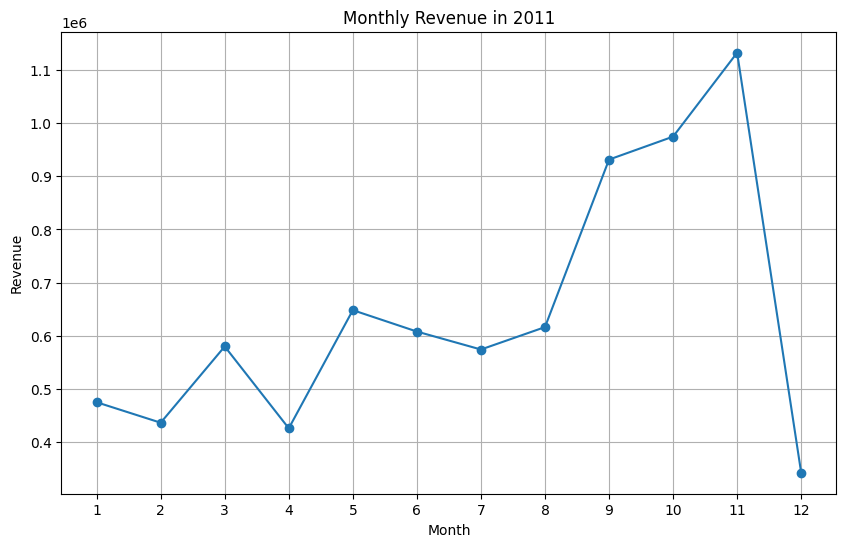

In [12]:
import matplotlib.pyplot as plt

df_2011 = df[df['InvoiceDate'].dt.year == 2011]
monthly_revenue = df_2011.groupby(df_2011['InvoiceDate'].dt.month)['Revenue'].sum()

plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='line', marker='o')
plt.title("Monthly Revenue in 2011")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.grid(True)
plt.xticks(range(1, 13))
plt.show()


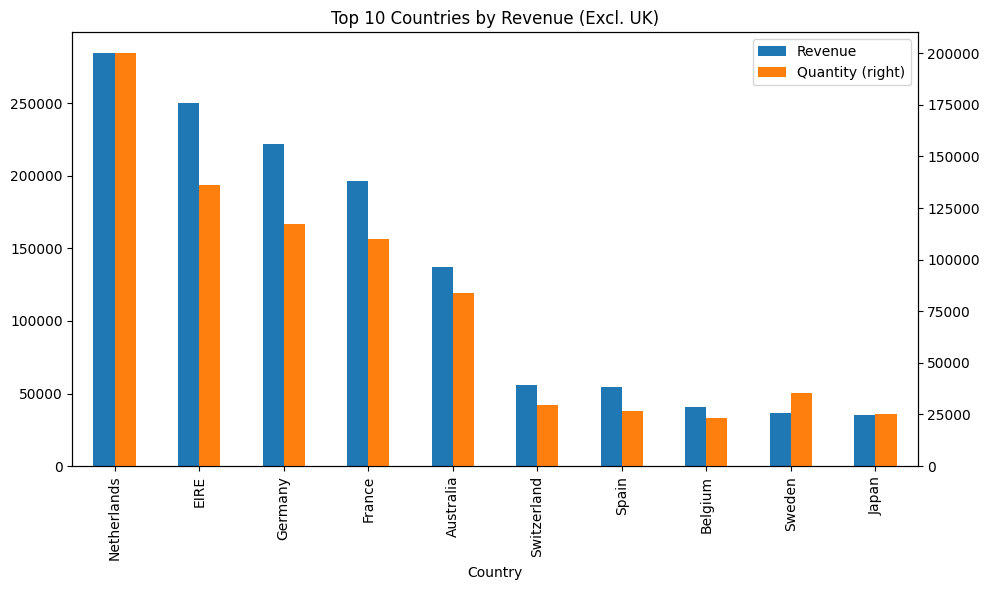

In [13]:
top_countries = df[df['Country'] != 'United Kingdom'].groupby('Country')[['Revenue', 'Quantity']].sum()
top_countries = top_countries.sort_values('Revenue', ascending=False).head(10)

top_countries.plot(kind='bar', figsize=(10, 6), secondary_y='Quantity', title='Top 10 Countries by Revenue (Excl. UK)')
plt.xlabel("Country")
plt.tight_layout()
plt.show()


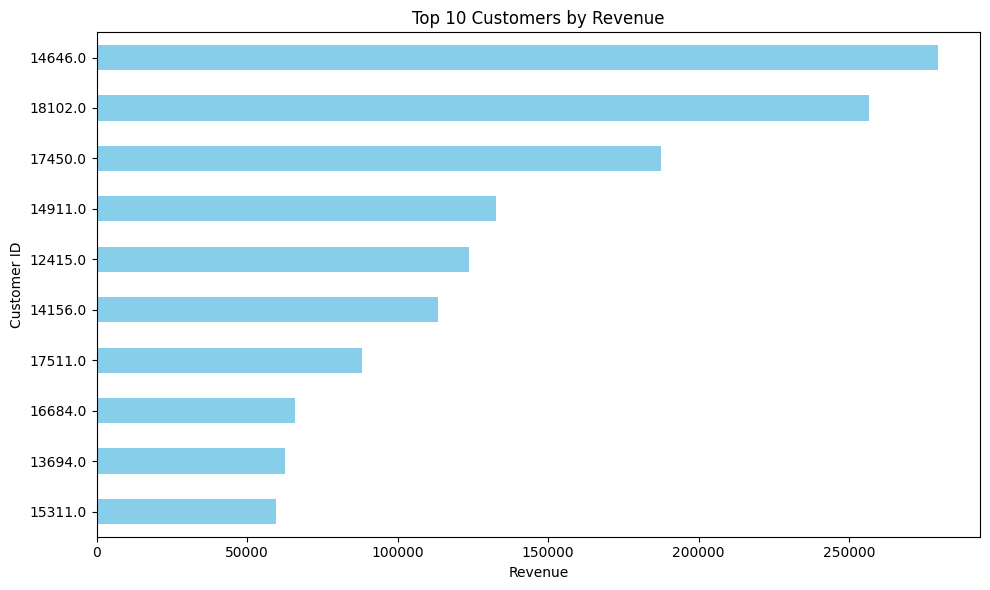

In [14]:
top_customers = df.groupby('CustomerID')['Revenue'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
top_customers.sort_values().plot(kind='barh', color='skyblue')
plt.title("Top 10 Customers by Revenue")
plt.xlabel("Revenue")
plt.ylabel("Customer ID")
plt.tight_layout()
plt.show()


In [15]:
import plotly.express as px

country_demand = df[df['Country'] != 'United Kingdom'].groupby('Country')['Quantity'].sum().reset_index()
fig = px.choropleth(
    country_demand,
    locations='Country',
    locationmode='country names',
    color='Quantity',
    title='Product Demand by Country (Excl. UK)',
    color_continuous_scale='Blues'
)
fig.show()
